In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Gear Generation Notes

## Initial Design Assumptions

Assuming a $14.5^{\circ}$ **pressure angle**. A lower pressure angle is less sensitive to manufacturing errors and less prone to backlash, two qualities we are concerned about.

## Notable Constraints

The **Pitch Diameter** $D$ is set as 10.3 mm

The **Root Diameter** $D_R$ is set by the size of the hole that clears the servo base. The diameter of the servo base is 5.21 mm. 

$$
D_R = D - 2d
$$

where $d$ is the **dedendum** of the gear 

$$
d = 1.157/P
$$

1.157 is a value that depends on the pressure angle, and $P$ is the **Diametrical Pitch** (not to be confused with the pitch diameter)

$$
P = N/D
$$

Where $N$ is the number of gear teeth. 

Therefore, 

$$
D_R = D - 2\frac{1.157D}{N}
$$

Additionally, the **outer diameter** needs to be such that the arms being reinforced from the other side have clearance. The maximum outer diameter is therefore 13.754 mm. It can be related to the pitch diameter by

$$
D_O = D + 2a
$$

Where $a$ is the **addendum** and is calculated using

$$
a = \frac{1}{P} = \frac{D}{N}
$$

therefore
$$
D_O = D+2\frac{D}{N}
$$

and we can solve for N to find the maximum number of gear teeth for a known pitch diameter and root diameter. 




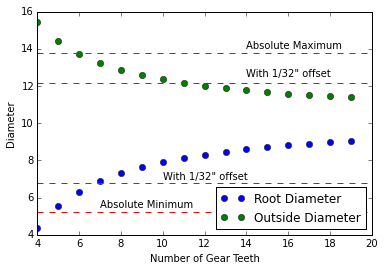

In [26]:
#Physical Parameters
D = 10.3 #mm
minD_R = 5.21 #mm
maxD_O = 13.754 #mm

#Going through a large number of possible teeth numbers
n_vals = range(4,20)
drvals = []
dovals = []

for nval in n_vals:
    drvals.append(D-2*1.157*D/nval)
    dovals.append(D+2*D/nval)
    
plot(n_vals,drvals,'o',label="Root Diameter")
plot(n_vals,dovals,'o',label="Outside Diameter")
axhline(y=minD_R,linestyle='--', color ='r')
text(14,14,"Absolute Maximum")
axhline(y=maxD_O,linestyle='--', color ='r')
text(14,12.5,"With 1/32\" offset")
axhline(y=maxD_O-1.0/32*25.4*2,linestyle='--', color ='r')
text(7,5.5,"Absolute Minimum")
axhline(y=minD_R+1.0/32*25.4*2,linestyle='--', color ='r')
text(10,7,"With 1/32\" offset")

legend(loc=4)

xlabel("Number of Gear Teeth")
ylabel("Diameter (mm)")

## Conclusions

We find that the more stringent criterion on our design is the outer diameter. In order to accomodate the opposite arms, we need to choose a gear with at a minimum 12 teeth. We therefore choose a gear with 13 teeth to be safe. 

